# Лабораторная работа №3

### Название: расчет кривой фазового равновесия аргона

### Гарифуллин Камиль, Б04-902

### Цель работы: при помощи двухфазного моделирования получить равновесные плотности жидкой и газовой фазы аргона для одной из температур и сравнить с экспериментом. Для каждой из фаз получить химические потенциалы. Получить кривую фазового равновесия.

## Ход работы:

1)Получим равновесные плотности жидкой и газовой фазы при помощи двухфазного моделирования для температуры T = 0.95(lj units). При этой температуре должны существуют обе фазы. 

lj units:
$$\sigma = 3.405 m$$
$$\epsilon = 0.2381 Kcal/mole$$

Для этого был написан скприпт на LAMMPS

Построим графики плотности системы в зависимости от координаты

In [81]:
T=0.95

In [122]:
coord3=[]
dens3=[]
f = open('0.95.densitx.txt')
count = 0
for line in f:
    count+=1
    if (count < 3008 ):
        continue
    if (count == 4008):
        break
    a=line.split()
    #print(a[0])
    #print(a)
    coord3.append(float(a[1]))
    dens3.append(float(a[3]))
    

In [123]:
coord=[]
dens=[]
f = open('0.95.densitx.txt')
count = 0
for line in f:
    count+=1
    if (count < 5):
        continue
    if (count == 1005):
        break
    a=line.split()
    #print(a[0])
    #print(a)
    coord.append(float(a[1]))
    dens.append(float(a[3]))

In [124]:
coord2=[]
dens2=[]
f = open('0.95.densitx.txt')
count = 0
for line in f:
    count+=1
    if (count < 4009):
        continue
    if (count == 5009):
        break
    a=line.split()
    #print(a[0])
    #print(a)
    coord2.append(float(a[1]))
    dens2.append(float(a[3]))

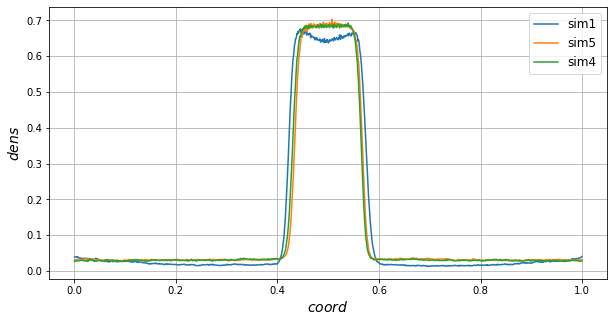

In [125]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(coord, dens, label=r'sim1')
plt.plot(coord2, dens2, label=r'sim5')
plt.plot(coord3, dens3, label=r'sim4')
plt.xlabel(r'$coord$', fontsize=14)
plt.ylabel(r'$dens$', fontsize=14)
plt.grid(True)
plt.legend(loc='best', fontsize=12)

plt.show()

Как видно из графиков 4 и 5 симуляции близки, что свидетельствует о двухфазном равновесии.

Переведем все величины в СИ. Посчитаем плотность газа и жидкости в равновесии:

In [175]:
s=0
s2=0
c2=0
c=0

for i in range(len(dens3)):
    if(dens3[i]>0.65):
        s=s+dens3[i]
        c+=1
    if(dens3[i]<0.10):
        s2=s2+dens3[i]
        c2+=1
d=s/c
d2 = s2/c2
print(d)
dens_liq = 0.040/(6.02*10**23*(3.405*10**(-10))**3)*max(dens)/1000
dens_gas = 0.040/(6.02*10**23*(3.405*10**(-10))**3)*d2/1000
T_si = T * 0.2381/0.0019872
print("dens_liq, SI: ", dens_liq,"g/ml")
print("dens_gas, SI: ", dens_gas,"g/ml")
print("T, K: ", T_si)

0.6813261727272727
dens_liq, SI:  1.1392507995651362 g/ml
dens_gas, SI:  0.05215418704839296 g/ml
T, K:  105.83815786030596


Для сравнения данные с NIST при Т = 105.87К, d(жидкости) = 1.273 g/ml

2)Получим кривую фазового равновесия и, разумеется, предоставим график.

Запуском in.nvt получим первую точку на фазовой диаграмме: P = 1.012 MPa, T = 113,826 K 

Далее пользуемся уравнением Клапейрона-Клаузиуса для расчета других точек фазовой диаграммы без расчета двухфазной системы. Уравнение Клапейрона-Клаузиуса при известной начальной точке $(P_0,T_0)$ можно рассматривать
как задачу Коши, которая может быть решена численно для получения кривой равновесия.
Как видно из уравнения Клапейрона-Клаузиуса, для получения величин в правой части уравнения
требуются только свойства фаз по отдельности, что позволяет избежать моделирования двухфазных систем.

# 2 точка

In [145]:
dT = 0.025
T = 0.95
P1 =  0.0241644340473015
H_liq = -3.65955358498029
H_gas = 1.90617919465434
V_liq = 1.37258633270537
V_gas = 32.4001569817897
P2 = P1 -(H_liq - H_gas)*dT/T/(V_liq-V_gas)
print(P2)

0.01944390166169655


In [102]:
P2

0.025047527551359344

In [153]:
dT = 0.0333333
T2 = 0.95-0.0333
P1 = 0.0241644340473015
H_liq2 = -3.85074673456546
H_gas2 = 1.89687917808022 
V_liq2 =  1.34145308947328
V_gas2 = 39.8075183723247
P3 = P1 - ((H_liq - H_gas)/T/(V_liq - V_gas) + (H_liq2- H_gas2)/T2/(V_liq2 - V_gas2))*dT/2
P3

0.018300777338246713

# 3 точка

In [161]:
dT = 0.0333
T = 0.9166666
P1 =  0.0183007773382467
H_liq = -3.85850783193823
H_gas = 1.92653200259269
V_liq = 1.34198710792927
V_gas = 42.9153795094196
P2 = P1 -(H_liq - H_gas)*dT/T/(V_liq-V_gas)
print(P2)

0.01324574759562727


In [163]:
dT = 0.0333333
T2 = 0.9166666-0.0333
P1 = 0.0183007773382467
H_liq2 = -4.05130805960755
H_gas2 = 1.93444567815344
V_liq2 = 1.31332014885751
V_gas2 = 59.3209939162096
P3 = P1 - ((H_liq - H_gas)/T/(V_liq - V_gas) + (H_liq2- H_gas2)/T2/(V_liq2 - V_gas2))*dT/2
P3

0.01382384799135495

In [162]:
0.9166666-0.033333

0.8833336

In [168]:
0.9166666-0.033333

0.8833336

# 4 точка

In [170]:
dT = 0.0333
T = 0.883333
P1 =  0.013823848
H_liq = -4.04067911950773
H_gas = 1.92611507444602
V_liq = 1.31402013509934
V_gas = 56.5072888003032
P2 = P1 -(H_liq - H_gas)*dT/T/(V_liq-V_gas)
print(P2)

0.009748405951874158


In [176]:
dT = 0.0333333
T2 = 0.883333-0.0333
P1 = 0.013823848
H_liq2 = -4.23135391181777
H_gas2 = 1.91805344913304
V_liq2 = 1.28758986919404
V_gas2 = 79.5498203822438
P3 = P1 - ((H_liq - H_gas)/T/(V_liq - V_gas) + (H_liq2- H_gas2)/T2/(V_liq2 - V_gas2))*dT/2
P3

0.010243476209127873

# 5 точка

In [179]:
dT = 0.0333
T = 0.85
P1 = 0.010243476209127873
H_liq = -4.2330318830224
H_gas = 1.90171373542848
V_liq = 1.28774634724349
V_gas = 75.1861608664546
P2 = P1 -(H_liq - H_gas)*dT/T/(V_liq-V_gas)
print(P2)

0.006991205062971326


In [182]:
dT = 0.0333333
T2 = 0.85-0.0333
P1 = 0.010243476209127873
H_liq2 = -4.41765852214568
H_gas2 = 1.88350077492559
V_liq2 = 1.26339535623287
V_gas2 = 108.724801310182
P3 = P1 - ((H_liq - H_gas)/T/(V_liq - V_gas) + (H_liq2- H_gas2)/T2/(V_liq2 - V_gas2))*dT/2
P3

0.007419101545349771

# 6 точка

In [186]:
dT = 0.0333
T = 0.8167
P1 = 0.007419101545349771
H_liq = -4.41851552088124
H_gas = 1.87431834194403 
V_liq = 1.26300936846143
V_gas = 102.259894861623
P2 = P1 -(H_liq - H_gas)*dT/T/(V_liq-V_gas)
print(P2)

0.004878597079729301


In [188]:
dT = 0.0333333
T2 = 0.8167-0.0333
P1 = 0.007419101545349771
H_liq2 = -4.59661602038576
H_gas2 =  1.84246264992456
V_liq2 = 1.2394837304087
V_gas2 = 152.245505604316
P3 = P1 - ((H_liq - H_gas)/T/(V_liq - V_gas) + (H_liq2- H_gas2)/T2/(V_liq2 - V_gas2))*dT/2
P3

0.005240397502765443

# 7 точка

In [192]:
dT = 0.0333
T = 0.7834
P1 = 0.005240397502765443
H_liq = -4.59548025684297
H_gas = 1.83307109047756
V_liq = 1.23948595663236
V_gas = 140.956254415187
P2 = P1 -(H_liq - H_gas)*dT/T/(V_liq-V_gas)
print(P2)

0.0032845938574913827


In [194]:
dT = 0.0333333
T2 = 0.7834-0.0333
P1 = 0.005240397502765443
H_liq2 = -4.77529077437588
H_gas2 = 1.79389377737263 
V_liq2 = 1.21755952969513
V_gas2 = 219.570602107051
P3 = P1 - ((H_liq - H_gas)/T/(V_liq - V_gas) + (H_liq2- H_gas2)/T2/(V_liq2 - V_gas2))*dT/2
P3

0.0035930486350009318

# 8 точка

In [196]:
dT = 0.0333
T = 0.75
P1 = 0.0035930486350009318
H_liq = -4.7791645988739
H_gas = 1.78319399098537
V_liq = 1.21764823883016
V_gas = 199.588369661415
P2 = P1 -(H_liq - H_gas)*dT/T/(V_liq-V_gas)
print(P2)

0.0021242395320232037


In [198]:
dT = 0.0333333
T2 = 0.75-0.0333
P1 = 0.0035930486350009318
H_liq2 = -4.95547574067093
H_gas2 =  1.73332590881411
V_liq2 = 1.19689567425385
V_gas2 = 328.107924772399
P3 = P1 - ((H_liq - H_gas)/T/(V_liq - V_gas) + (H_liq2- H_gas2)/T2/(V_liq2 - V_gas2))*dT/2
P3

0.002382103962329454

По полученным данным построим P-T диаграмму. Так же построим диаграмму по данным NIST. Сравним их.

In [206]:
P_teor=[0.84703, 0.65606, 0.50235, 0.3735, 0.272, 0.1926, 0.13158, 0.0868]
T_si = [113.8259863, 109.8320921, 105.8381979, 101.8443037, 97.85040945, 93.85651523, 89.86262101, 85.8687268]
P = [1.012090113, 0.766499881, 0.578990588, 0.429032229, 0.310733392, 0.219469332,  0.150487273, 0.099766]



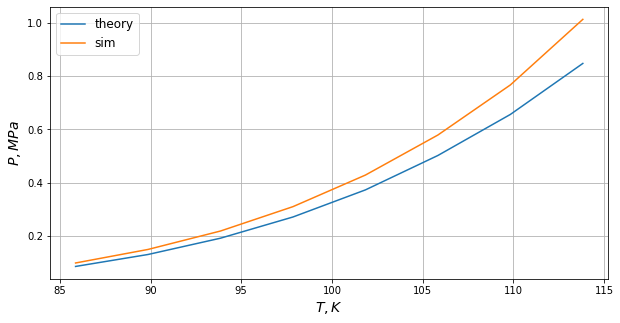

In [200]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(T_si, P_teor, label=r'theory')
plt.plot(T_si, P, label=r'sim')

plt.xlabel(r'$T, K$', fontsize=14)
plt.ylabel(r'$P, MPa$', fontsize=14)
plt.grid(True)
plt.legend(loc='best', fontsize=12)

plt.show()

3)Найдем хим. потенциалы газа и жидкости при T=0.95(lj). Расчет проведем методом Уидома.



$$\mu_{liq} = -3.07023\epsilon  = 0.731021763 Kcal/mole $$
$$\mu_{gas} = -0.315979\epsilon  = 0.0752345999 Kcal/mole $$


# Вывод:

Таким образом, при помощи двухфазного моделирования были получить равновесные плотности жидкой и газовой фазы аргона для T = 105.84 K, также эти значения были сравнены с экспериментом. Для каждой из фаз получены химические потенциалы, которые оказались не равными. Получена кривая фазового равновесия аргона.